# Text Classification workflow with `arcgis.learn`

<h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc">
<ul class="toc-item">
<li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li>
<li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-2">Prerequisites</a></span></li>
<li><span><a href="#Transformer-Basics" data-toc-modified-id="Transformer-Basics-3">Transformer Basics</a></span></li>
    
<li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-4">Data preparation</a></span></li>
<li><span><a href="#TextClassifier-model" data-toc-modified-id="TextClassifier-model-5">TextClassifier model</a></span></li>
<ul class="toc-item">
<li><span><a href="#How-to-choose-an-appropriate-model-for-your-dataset?" data-toc-modified-id="How-to-choose-an-appropriate-model-for-your-dataset?-5.1">How to choose an appropriate model for your dataset?</a></span>    
<li><span><a href="#Model-training" data-toc-modified-id="Model-training-5.2">Model training</a></span>
    <ul class="toc-item">
        <li><span><a href="#Finding-optimum-learning-rate" data-toc-modified-id="Finding-optimum-learning-rate-5.2.1">Finding optimum learning rate</a></span>
        <li><span><a href="#Evaluate-model-performance" data-toc-modified-id="Evaluate-model-performance-5.2.2">Evaluate model performance</a></span>
        <li><span><a href="#Validate-results" data-toc-modified-id="Validate-results-5.2.3">Validate results</a></span></li> 
    </ul>
</ul>
<li><span><a href="#Model-inference" data-toc-modified-id="Model-inference-6">Model inference</a></span></li>
<li><span><a href="#References" data-toc-modified-id="References-7">References</a></span></li>
</ul>
</div>

# Introduction


Text classification also known as text tagging or text categorization is the process of assigning tags/labels to unstructured text. Using Natural Language Processing (NLP), text classifiers can automatically analyze text and then assign a set of pre-defined tags or categories based on its content. 

As with any other classification problem, text classification can be broadly divided into 2 different categories:

- **Multi-class single-label text classification**
- **Multi-class multi-label text classification**

### Multi-class single-label text classification
The set of problems where one can associate only a single label to a given input text falls into this category. Take an example of a house address. The address can be associated with a single country. Hence classifying/ tagging a house address to a country is an example of multi-class single-label text classification problem. Other examples include:
- **Sentiment Analysis** on tweets/movie reviews.
- Classifying emails as **Spam vs not Spam**
- **Language detection** from text

### Multi-class multi-label text classification
The set of problems where one can associate multiple labels to a given input text falls into this category. Take an example where we are moderating a social media platform by flagging inappropriate user comments and posts. An inappropriate post can fall into multiple categories like toxic, threat, insult, obscene etc. Other examples include:
- **Analyze customer support tickets** to quickly assign appropriate categories.
- **Categorization of News Articles** into appropriate topics.

The `TextClassifier` class in `arcgis.learn.text` module is based on [Hugging Face Transformers](https://huggingface.co/transformers/v3.0.2/index.html) library. This library provides transformer models like BERT, RoBERTa, XLM, DistilBert, XLNet etc., for **Natural Language Understanding (NLU)** with over 32+ pretrained models in 100+ languages.

The transformers are the most latest and advanced models that give the state of the art results for a wide range of tasks such as **text / sequence classification**, **named entity recognition (ner)**, **question answering**, **machine translation**, **text summarization**, **text generation**, etc.

# Prerequisites

- Data preparation and model training workflows for text classification using `arcgis.learn.text` is based on [Hugging Face Transformers](https://huggingface.co/transformers/v3.0.2/index.html) library. A user can choose an appropriate architecture to train the model.
- Refer to the section [Install deep learning dependencies of arcgis.learn module](https://developers.arcgis.com/python/guide/install-and-set-up/#Install-deep-learning-dependencies) for detailed explanation about deep learning dependencies.
- **Labeled data**: For `TextClassifier` to learn, it needs to see examples that have been labeled for all the custom categories that the model is expected to classify an input text into. Head to the **Data preparation** section to see the supported formats for training data.

# Transformer Basics

Transformers in NLP are novel architectures that aims to solve [sequence-to-sequence](https://towardsdatascience.com/understanding-encoder-decoder-sequence-to-sequence-model-679e04af4346) tasks while handling [long-range dependencies](https://medium.com/tech-break/recurrent-neural-network-and-long-term-dependencies-e21773defd92) with ease. The Transformer was proposed in the paper [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf). A transformer consists of an encoding component, a decoding component, and connections between them.

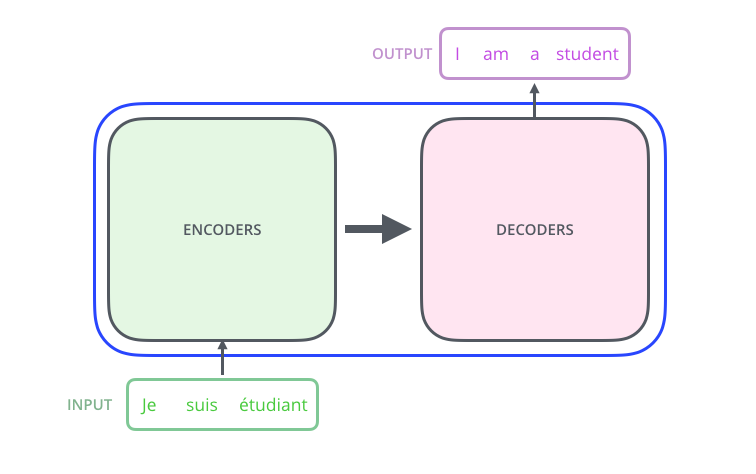

<center>Figure1: A high-level view depicting components of a Transformer [1]</center>

- The **Encoding component** is a stack of encoders (the paper stacks six of them on top of each other). 
- The **Decoding component** is a stack of decoders of the same number. 

The encoders are all identical in structure (yet they do not share weights). Each one is broken down into two sub-layers:
- **Self-Attention Layer**
  - Say the following sentence is an input sentence we want to translate:
  
    **`The animal didn't cross the street because it was too tired`**
    
    What does **"it"** in this sentence refer to? Is it referring to the **street** or to the **animal**? It's a simple question to a human, but not as simple to an algorithm. When the model is processing the word **"it"**, self-attention allow the model to associate **"it"** with **"animal"**.

- **Feed Forward Layer** - The outputs of the self-attention layer are fed to a feed-forward neural network. 

The decoder has both those layers (**self-attention** & **feed forward layer**), but between them is an **attention layer** (sometimes called **encoder-decoder attention**) that helps the decoder focus on relevant parts of the input sentence.

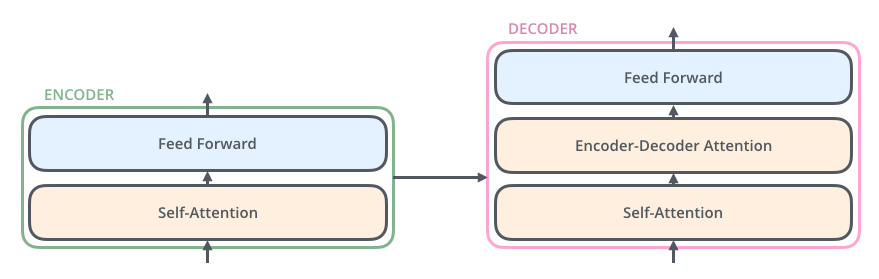

<center>Figure2: Different Layers in Transformer's Encoder & Decoder component[1]</center>

To get a more detailed explanation on how **attention**[[2]](#References) mechanism works in transformer models visit [this page](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/). 

An **“annotated”**[[3]](#References) version of the paper is also present in the form of a line-by-line implementation of the transformer architecture.

# Data preparation

The `TextClassifier` class in `arcgis.learn.text` module can consume labeled training data in [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) or [TSV](https://en.wikipedia.org/wiki/Tab-separated_values) file format

There is a slight variation in the way the input data is created for 
- **Multi-class single-label text classification**
- **Multi-class multi-label text classification**

Sample input data format for **Multi-class single-label text classification** problem

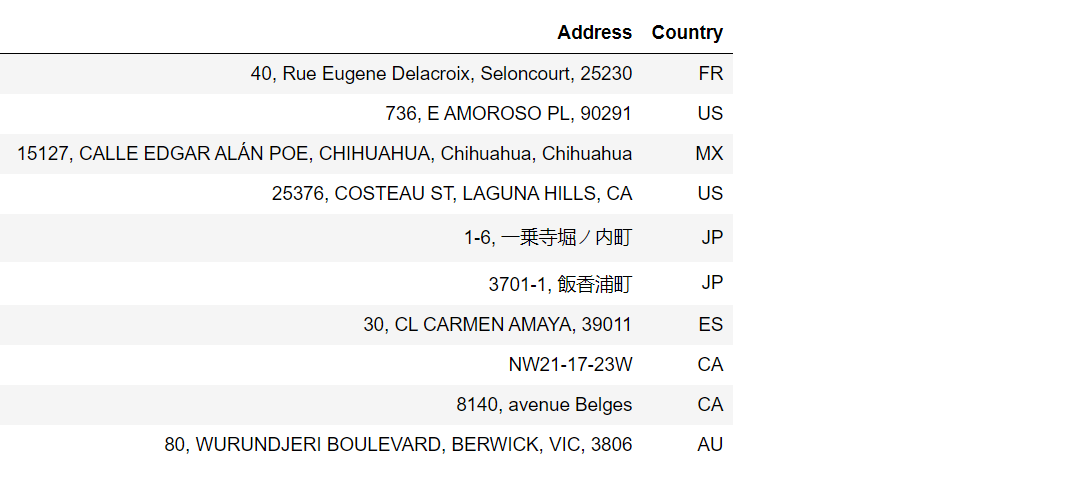

Sample input data format for **Multi-class multi-label text classification** problem

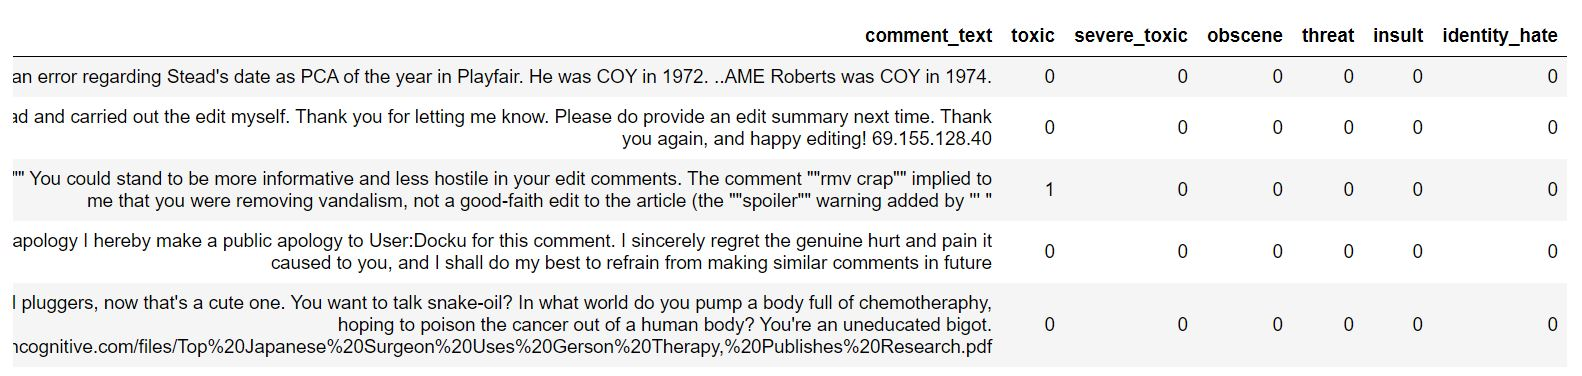

The main difference is that in a **Multi-class single-label text classification** problem, we have a single target column, but in a **Multi-class multi-label text classification** problem we have multiple target columns to train the model. The class values are **binary(0/1)**, where the value of **1** represents the presence of a particular class/label for the given training sample and **0** represents the absence of it. In the sample shown above a text can be assigned into 6 different categories **`toxic`**, **`severe_toxic`**, **`obscene`**, **`threat`**, **`insult`** and **`identity_hate`**. A  column value of **1** (see row **#3**) means that the comment/text is labeled as the column name (**toxic** in this case).

**Data preparation** involves splitting the data into training and validation sets, creating the necessary data structures for loading data into the model and so on. The `prepare_textdata` function can directly read the training samples in one of the above specified formats and automate the entire process. While calling this function, the user has to provide the following arguments:
- **path**&nbsp;&ensp;&emsp;&emsp;&emsp;&emsp;- &emsp;&emsp;&emsp;&emsp;        The **full directory path** where the **training file** is present
- **task**&nbsp;&ensp;&emsp;&nbsp;&emsp;&emsp;&emsp;- &emsp;&emsp;&emsp;&emsp;       The **task** for which the **dataset** is being prepared. The available choice at this point is **"classification"**
- **train_file**&nbsp;&ensp;&emsp;&nbsp;&ensp;&nbsp;-  &emsp;&emsp;&emsp;&emsp; The file name containing the **training data**. Supported file formats/extensions are **.csv** and **.tsv**
- **text_columns**&nbsp;&nbsp;-  &emsp;&emsp;&emsp;&emsp; The column name in the csv/tsv file that will be used as **feature**.
- **label_columns** -  &emsp;&emsp;&emsp;&emsp;The list of columns denoting the class label to predict. Provide a list of columns in case of a multi-label classification problem

Some pre-processing functions are also provided like removing [HTML tags](https://html.com/tags/) from the text or removing the [URLs](https://en.wikipedia.org/wiki/URL) from the text. Users can decide if these pre-processing steps are required for their dataset or not.

**A note on the dataset**
- The data is collected around 2020-05-27 by [OpenAddresses](http://openaddresses.io).
- The data licenses can be found in `data/country-classifier/LICENSE.txt`.

In [1]:
import pandas as pd
from arcgis.learn import prepare_textdata
from arcgis.learn.text import TextClassifier

In [2]:
DATA_ROOT = "data/country_classifier/"

In [3]:
data = prepare_textdata(DATA_ROOT, "classification", train_file="house-addresses.csv", 
                        text_columns="Address", label_columns="Country", batch_size=64)

In [4]:
print(data.classes)

['US', 'BE', 'AU', 'ZA', 'CA', 'BR', 'MX', 'FR', 'JP', 'ES']


The `show_batch()` method can be used to visualize the training samples, along with labels.

In [6]:
data.show_batch(rows=10)

Address,Country
"10, Place Cockerill, 0051, 4000",BE
"547, RUA DIRCEU LOPES, CASA, Pedro Leopoldo, MG, 33600-000",BR
"2, Rue de Ker Izella, Botsorhel, 29650",FR
"168, RUA CORONEL MOREIRA CESAR, APARTAMENTO 402, Niterói, RJ, 24230-062",BR
"732P, CL ARENAL, 33740",ES
"17-9, 高柳新田",JP
"S/N, CALLE VENUSTIANO CARRANZA, NICOLÁS BRAVO, Othón P. Blanco, Quintana Roo",MX
"SN, CALLE FRONTERA, MAZATLÁN, Mazatlán, Sinaloa",MX
"41, Oostmallebaan, Zoersel, 2980",BE
"SN, RUA ENGENHO PROPRIEDADE, Sirinhaém, PE, 55580-000",BR


# TextClassifier model

`TextClassifier` model in `arcgis.learn.text` is built on top of [Hugging Face Transformers](https://huggingface.co/transformers/v3.0.2/index.html) library. The model training and inferencing workflow are similar to computer vision models in `arcgis.learn`. 

Run the command below to see which transformer backbones are supported for the classification task.

In [7]:
print(TextClassifier.supported_backbones)

['BERT', 'RoBERTa', 'DistilBERT', 'ALBERT', 'FlauBERT', 'CamemBERT', 'XLNet', 'XLM', 'XLM-RoBERTa', 'Bart', 'ELECTRA', 'Longformer', 'MobileBERT']


## How to choose an appropriate model for your dataset?

[This page](https://huggingface.co/transformers/v3.0.2/pretrained_models.html) mentions different **transformers** architectures [[4]](#References) which come in different sizes (model parameters), trained on different languages /corpus, having different attention heads, etc. Not every model can be used for `text classification` purpose. As of now, there are around 13 models that can be used to perform `text classification`. These are `BERT`[[5]](#References), `RoBERTa`, `DistilBERT`, `ALBERT`, `FlauBERT`, `CamemBERT`, `XLNet`, `XLM`, `XLM-RoBERTa`, `Bart`, `ELECTRA`, `Longformer` and `MobileBERT`


Some consideration has to be made to pick the right transformer architecture for the problem at hand. 
- Some models like `BERT`, `RoBERTa`, `XLNET`, `XLM-RoBERTa` are highly accurate but at the same time are larger in size. Generating inference from these models is somewhat slow.
- If one wishes to sacrifice a little accuracy over a high inferencing and training speed one can go with `DistilBERT`.
- If the model size is a constraint then one can either choose `ALBERT` or `MobileBERT`. Remember the model performance will not be as great compared to models like `BERT`, `RoBERTa`, `XLNET`, etc.
- If you have a dataset in the **French** language one can choose from `FlauBERT` or `CamemBERT` as these language model are trained on **French** text.
- When dealing with **long sentences/sequences** in training data one can choose from `XLNET`, `Longformer`, `Bart`.
- Some models like `XLM`, `XLM-RoBERTa` are [multi-lingual models](https://huggingface.co/transformers/v3.0.2/multilingual.html) i.e, models trained on multiple languages. If your dataset consists of text in multiple languages you can choose models mentioned in the above link. 
  - The model sizes of these transformer architectures are very large (in GBs). 
  - They require large memory to fine tune on a particular dataset.
  - Due to the large size of these models, inferencing a fined-tuned model will be somewhat slow on CPU.

The HuggingFace Transformers library provides a wide variety of models for each of the backbone listed above. To see the full list visit [this](https://huggingface.co/transformers/pretrained_models.html) link.

- The call to `available_backbone_models` method will list out only a few of the available models for each backbone. 
- This list is not exhaustive and only contains a subset of the models listed in the link above. This function is created to give a general idea to the user about the available models for a given backbone.
- That being said, the `TextClassifier` module supports any model from the 13 available backbones.
- Some of the Transformer models are quite large due to the high number of training parameters or high number of intermediate layers. Thus large models will have large CPU/GPU memory requirements.

In [8]:
print(TextClassifier.available_backbone_models("xlm-roberta"))

('xlm-roberta-base', 'xlm-roberta-large')


Construct the `TextClassifier` by passing the data and the backbone you have chosen.

The dataset consists of addresses in multiple languages like Japanese, English, French, Spanish, etc. hence we will use a [multi-lingual transformer backbone](https://huggingface.co/transformers/v3.0.2/multilingual.html) like `XLM-RoBERTa` to train our model.

In [9]:
model = TextClassifier(data, backbone="xlm-roberta-base")

## Model training

### Finding optimum learning rate

In machine learning, the `learning rate`[[6]](#References) is a tuning parameter that determines the step size at each iteration while moving toward a minimum of a loss function, it represents the speed at which a machine learning model "learns"

- If the **learning rate is low**, then model training will take a lot of time because steps towards the minimum of the loss function are tiny.
- If the **learning rate is high**, then training may not converge or even diverge. Weight changes can be so big that the optimizer overshoots the minimum and makes the loss worse.

We have to find an **optimum learning rate** for the dataset we wish to train our model on. To do so we will call the `lr_find()` method of the model.

**Note**

- A user is not required to call the `lr_find()` method separately. If `lr` argument is not provided while calling the `fit()` method then `lr_find()` method is internally called by the `fit()` method to find the optimal learning rate.

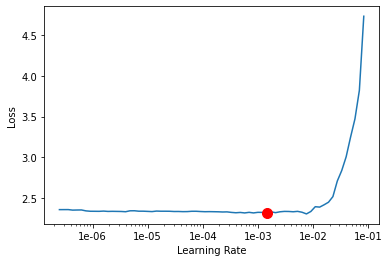

0.001445439770745928

In [10]:
model.lr_find()

Training the model is an iterative process. We can train the model using its `fit()` method till the validation loss (or error rate) continues to go down with each training pass also known as epoch. This is indicative of the model learning the task.

In [11]:
model.fit(epochs=4, lr=0.001)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.126231,0.576036,0.815700,0.184300,01:17
1,0.912596,0.651581,0.780300,0.219700,01:20
2,0.782030,0.421800,0.838600,0.161400,01:19
3,0.771655,0.380512,0.852300,0.147700,01:15


By default, the earlier layers of the model (i.e. the backbone) are frozen and their weights are not updated when the model is being trained. Once the later layers have been sufficiently trained, the earlier layers are unfrozen (by calling `unfreeze()` method of the `TextClassifier` class) and fine-tuned to the nuances of the particular text in the dataset.

In [12]:
model.unfreeze()

In [13]:
model.fit(epochs=6)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.173400,0.111699,0.956300,0.043700,05:24
1,0.062744,0.044339,0.981100,0.018900,05:15
2,0.040257,0.029966,0.986300,0.013700,05:22
3,0.032077,0.024974,0.989300,0.010700,05:32
4,0.030770,0.024296,0.989800,0.010200,05:19
5,0.027273,0.023898,0.990600,0.009400,05:21


### Evaluate model performance

In [14]:
model.accuracy()

0.9906

Other important metrics to look at are Precision, Recall & F1-measures [[7]](#References).

Here is a brief description of them:
- **Precision** -  Precision talks about how precise/accurate your model is. Out of those predicted positive, how many of them are actually positive.  
- **Recall** - Recall is the ability of the classifier to find all the positive samples.
- **F1** - F1 can be interpreted as a weighted harmonic mean of the precision and recall

To learn more about these metrics one can visit the following link - [Precision, Recall & F1 score](https://en.wikipedia.org/wiki/Precision_and_recall)

To find `precision`, `recall` & `f1` scores per label/class we will call the model's `metrics_per_label()` method.

In [15]:
model.metrics_per_label()

,Precision_score,Recall_score,F1_score,Support
AU,1.0000,1.0000,1.0000,929.0
BE,1.0000,1.0000,1.0000,1043.0
BR,1.0000,1.0000,1.0000,950.0
CA,0.9295,0.9799,0.9541,996.0
ES,1.0000,1.0000,1.0000,982.0
FR,1.0000,1.0000,1.0000,1009.0
JP,1.0000,0.9990,0.9995,989.0
MX,1.0000,1.0000,1.0000,1024.0
US,0.9803,0.9318,0.9554,1070.0
ZA,1.0000,1.0000,1.0000,1008.0


###  Validate results

Once we have the trained model, we can see the results to see how it performs.

In [16]:
model.show_results(15)

text,target,prediction
"SN, AVENIDA JOSE MARIA MORELOS Y PAVON OTE., APATZINGÁN DE LA CONSTITUCIÓN, Apatzingán, Michoacán de Ocampo",MX,MX
"906, AVENIDA JOSEFA ORTÍZ DE DOMÍNGUEZ, CIUDAD MENDOZA, Camerino Z. Mendoza, Veracruz de Ignacio de la Llave",MX,MX
"32, CIRCUITO JOSÉ MARÍA URIARTE, FRACCIONAMIENTO RANCHO ALEGRE, Tlajomulco de Zúñiga, Jalisco",MX,MX
"SN, ESTRADA SP 250 SENTIDO GRAMADAO, LADO DIREITO FAZENDA SAO RAFAEL CASA 4, São Miguel Arcanjo, SP, 18230-000",BR,BR
"SN, CALLE JOSEFA ORTÍZ DE DOMÍNGUEZ, RINCÓN DE BUENA VISTA, Omealca, Veracruz de Ignacio de la Llave",MX,MX
"SN, CALLE MICHOACAN, DOLORES HIDALGO CUNA DE LA INDEPENDENCIA NACIONAL, Dolores Hidalgo Cuna de la Independencia Nacional, Guanajuato",MX,MX
"SN, CALLE VERDUZCO, COALCOMÁN DE VÁZQUEZ PALLARES, Coalcomán de Vázquez Pallares, Michoacán de Ocampo",MX,MX
"1712, CALLE MÁRTIRES DEL 7 DE ENERO, CIUDAD MENDOZA, Camerino Z. Mendoza, Veracruz de Ignacio de la Llave",MX,MX
"SN, AVENIDA JACOBO GÁLVEZ, FRACCIONAMIENTO RANCHO ALEGRE, Tlajomulco de Zúñiga, Jalisco",MX,MX
"SN, ANDADOR MZNA 6 AMP. LOS ROBLES, EL PUEBLITO (CRUCERO NACIONAL), Córdoba, Veracruz de Ignacio de la Llave",MX,MX


Test the model prediction on an input text

In [17]:
text = """1016, 8A, CL RICARDO LEON - SANTA ANA (CARTAGENA), 30319"""
print(model.predict(text))

('1016, 8A, CL RICARDO LEON - SANTA ANA (CARTAGENA), 30319', 'ES', 1.0)


Once you are satisfied with the model, you can save it using the `save()` method. This creates a **Deep Learning Package (DLPK file)** that can be used for inferencing on unseen data. 

In [18]:
model.save("country-classifier")

Computing model metrics...


WindowsPath('models/country-classifier')

# Model inference

The trained model can be used to classify new text documents using the `predict()` method. This method accepts a string or a list of strings to predict the labels of these new documents/text.

In [19]:
# Here we are picking addresses from validation dataset, but user can pick/create his/her own list 
text_list = data._valid_df.sample(15).Address.values
result = model.predict(text_list)

df = pd.DataFrame(result, columns=["Address", "CountryCode", "Confidence"])

df.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])\
        .set_properties(**{'text-align': "left"}).hide_index()

Address,CountryCode,Confidence
"136, AV MARINA ALTA DE LA, 3740",ES,0.999972
"3, CL CLOTS DELS, 43791",ES,1.000000
"FAZENDA LAJEADO, Mimoso do Sul, ES, 29400-000",BR,1.000000
"118, CALLE MONTE DE PIEDAD, SAN JUAN DE LOS LAGOS, San Juan de los Lagos, Jalisco",MX,1.000000
"138A, CALLE EMILIANO ZAPATA, CIUDAD GUZMÁN, Zapotlán el Grande, Jalisco",MX,1.000000
"28, Rue Gustave Eiffel, Brie-Comte-Robert, 77170",FR,1.000000
"19235, AVENUE 6, MADERA, 93637",US,0.999995
"2734, CALLE GÓMEZ FARÍAS, GUADALAJARA, Guadalajara, Jalisco",MX,1.000000
"4237, WHISKEY AVE",CA,0.542203
"224, SWANSEA ROAD, MOUNT EVELYN, VIC, 3796",AU,1.000000


# References

[1] [Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)

[2] [Attention and its Different Forms](https://towardsdatascience.com/attention-and-its-different-forms-7fc3674d14dc)

[3] [The Annotated Transformer](http://nlp.seas.harvard.edu/2018/04/03/attention.html)

[4] [Summary of the models](https://huggingface.co/transformers/summary.html)

[5] [BERT Paper](https://arxiv.org/pdf/1810.04805.pdf)

[6] [Learning Rate](https://en.wikipedia.org/wiki/Learning_rate)

[7] [Precision, recall and F1-measures](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures)